<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


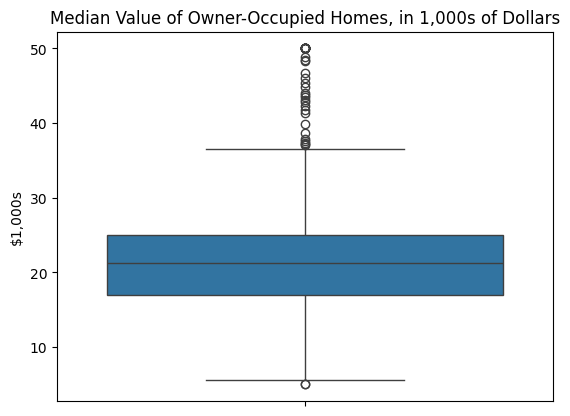

The data show that the median value of an owner-occupied home in Boston was a little over $20,000 and that
with the exception of a number of high-valued outliers, the prices ranged from about $4,000 to $36,000


In [7]:
ax = sns.boxplot(y="MEDV", data=boston_df).set(ylabel = '$1,000s',title = 'Median Value of Owner-Occupied Homes, in 1,000s of Dollars')
pyplot.show()

print('The data show that the median value of an owner-occupied home in Boston was a little over $20,000 and that')
print('with the exception of a number of high-valued outliers, the prices ranged from about $4,000 to $36,000')


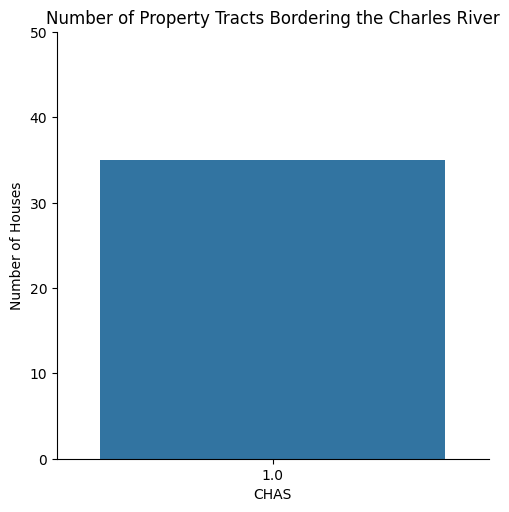

In [10]:
chasriver_df = boston_df[boston_df['CHAS'] == 1]
sns.catplot(x='CHAS', kind = 'count', data=chasriver_df).set(ylabel = 'Number of Houses',title = 'Number of Property Tracts Bordering the Charles River')
pyplot.ylim(0,50)
pyplot.show()

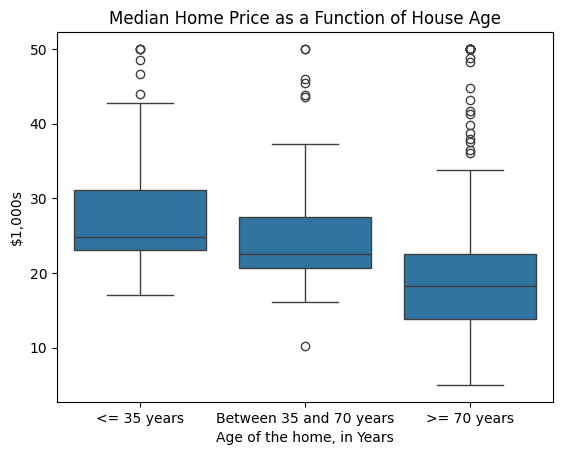

The data show that there is a negative trend in median home value with increasing age of the home.


In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '<= 35 years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '>= 70 years'

ax = sns.boxplot(x="Age_Group", y="MEDV", order = ['<= 35 years','Between 35 and 70 years','>= 70 years'], data=boston_df).set(ylabel = '$1,000s',xlabel = 'Age of the home, in Years',
                                                                                title = 'Median Home Price as a Function of House Age')
pyplot.show()
print('The data show that there is a negative trend in median home value with increasing age of the home.')


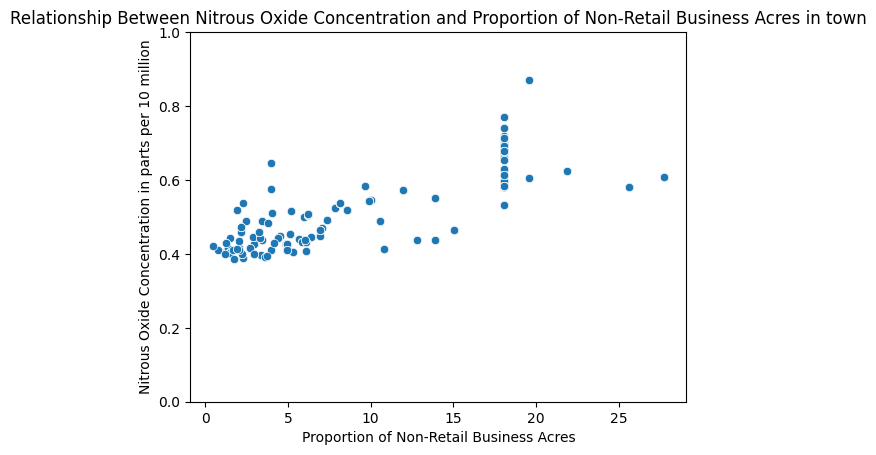

The data show a positive correlation between the concentration of nitrous oxide and the amount of non-retail business acerage


In [27]:
ax = sns.scatterplot(x='INDUS', y = 'NOX', 
                     data = boston_df).set(ylabel = 'Nitrous Oxide Concentration in parts per 10 million', xlabel = 'Proportion of Non-Retail Business Acres',
                                           title = 'Relationship Between Nitrous Oxide Concentration and Proportion of Non-Retail Business Acres in town')
pyplot.ylim(0, 1)
pyplot.show()
print('The data show a positive correlation between the concentration of nitrous oxide and the amount of non-retail business acerage')

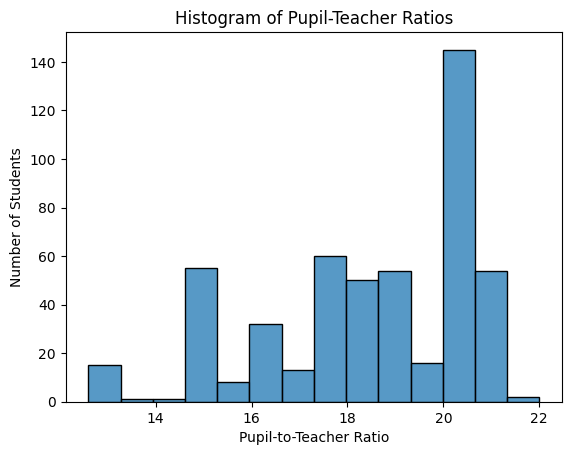

The data show a skewed distribution of the pupil-to-teacher ratio, with most clustered in the 17-21 range.


In [30]:
ax = sns.histplot(boston_df['PTRATIO']).set(ylabel = 'Number of Students', xlabel = 'Pupil-to-Teacher Ratio', title = 'Histogram of Pupil-Teacher Ratios')
pyplot.show()
print('The data show a skewed distribution of the pupil-to-teacher ratio, with most clustered in the 17-21 range.')

In [43]:
print('Understanding the Data - Question 1:')
print('Is there a significant difference in median value of houses bounded by the Charles river or not?')
print()
print('Establish the null hypothesis: The median valus of houses adjacent to the Charles river is equal to the median values of houses that do not border the river.')
print('Establish the alternative hypothesis: There is a difference in median house values.')
print()
# Determine whether the variances in the two groups are the same using a Levene test

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# The resulting p-value is 0.0032 which is less than 0.05 so the variances of the two groups are NOT the same so we should not use a t-test according to an example earlier in the class.
# However, inspection of the above boxplot for MEDV indicates quite a few outliers so I will ignore this issue and proceed with a t-test, because 
# the question specifically called out using a t-testand set the equal_var arguement  = False

print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False))
print()
print('Because the p-value is 0.00356, which is less than 0.05, we must reject the null hypothesis and')
print('conclude that there is a significant difference in the median house values depending on whether they are by the Charles River')
print()


Understanding the Data - Question 1:
Is there a significant difference in median value of houses bounded by the Charles river or not?

Establish the null hypothesis: The median valus of houses adjacent to the Charles river is equal to the median values of houses that do not border the river.
Establish the alternative hypothesis: There is a difference in median house values.

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Because the p-value is 0.00356, which is less than 0.05, we must reject the null hypothesis and
conclude that there is a significant difference in the median house values depending on whether they are by the Charles River



In [52]:
print()
print('Understanding the Data - Question 2:')
print('Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?')
print()
print('In order to use an Anova, we need more than two groups.  Above we broke apart the AGE variable into 3 groups.  We will continue that approach here.')  
# In order to answer the question whether MEDV varies with AGE 
# we use the three sets and determine whether they all have identical medians.  If they don't, then MEDV varies with AGE and those built prior to 1940 will have a unique MEDV.
print()
print('Establish the null hypothesis: The median values of owner occupied units with house AGE either <35, >70 or between 35 and 70 are identical')
print('Establish the alternative hypothesis: There is a difference in the means and therefore homes built prior to 1940 will have their own unique MEDV')
print()

Newhome = boston_df[boston_df['Age_Group'] == '<= 35 years']['MEDV']
Medium = boston_df[boston_df['Age_Group'] == 'Between 35 and 70 years']['MEDV']
Oldhome = boston_df[boston_df['Age_Group'] == '>= 70 years']['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(Newhome,Medium,Oldhome)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
print()
print('Because the p value is less than 0.05 (it is 1.71e-15) we reject the null hypothesis and can')
print('Conclude that there is a difference in median home prices for those built prior to 1940')
print()



Understanding the Data - Question 2:
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In order to use an Anova, we need more than two groups.  Above we broke apart the AGE variable into 3 groups.  We will continue that approach here.

Establish the null hypothesis: The median values of owner occupied units with house AGE either <35, >70 or between 35 and 70 are identical
Establish the alternative hypothesis: There is a difference in the means and therefore homes built prior to 1940 will have their own unique MEDV

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15

Because the p value is less than 0.05 (it is 1.71e-15) we reject the null hypothesis and can
Conclude that there is a difference in median home prices for those built prior to 1940



In [53]:
print('Understanding the Data - Question 3:')
print('Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?')
print()
print('Establish the null hypothesis: NOX concentrations are not correlated with INDUS')
print('Establish the alternative hypothesis: There is a correlation between NOX and INDUS')
print()
print(scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']))
print()
print('CONCLUSION: Because the p-value of 7.9e-98 is less than 0.05, we must reject the null hypothesis and conclude that there is a correlation (a very strong one!)')
print('between nitrous oxide levels and the amount of non-retail business acres')
print()


Understanding the Data - Question 3:
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Establish the null hypothesis: NOX concentrations are not correlated with INDUS
Establish the alternative hypothesis: There is a correlation between NOX and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

CONCLUSION: Because the p-value of 7.9e-98 is less than 0.05, we must reject the null hypothesis and conclude that there is a correlation (a very strong one!)
between nitrous oxide levels and the amount of non-retail business acres



In [57]:
print()
print('Understanding the Data - Question 4:')
print('What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?')
print()
print('Establish the null hypothesis: the coefficient beta = 0 (Weighted distance to the employment centers has no effect on MEDV)')
print()
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())
print()
print()

print('Because the p-value is < 0. 05 (p = 0.000 in resulting regression analysis data table),')
print('we reject the null hypothesis and conclude that DIS affects MEDV.')
print('Additionaly, the coefficient is positive 1.09, suggesting that each weighted mile father from an employment center increases the median home value by $1,090 on average.')
print()





Understanding the Data - Question 4:
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Establish the null hypothesis: the coefficient beta = 0 (Weighted distance to the employment centers has no effect on MEDV)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        12:18:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                             